匯入所需套件<br>
各套件用途:<br>
&emsp;  tensorflow2.0&emsp;深度學習的框架，方便建立模型及訓練<br>
&emsp;  numpy&emsp;&emsp;&emsp;&emsp;進行矩陣運算用，python的乘法運行速度太慢<br>
&emsp;  matplotlib&emsp;&emsp;&ensp;在python中類似matlab的繪圖工具，用於數據分析<br>
&emsp;  os&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;在python中關於作業系統操作呼叫的相關模組，對檔案進行重新命名、刪除等操作<br>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, losses, optimizers, datasets
import numpy as np
import matplotlib.pyplot as plt
from Moduless import Read_Dataset
# import pydot
# import os

建立LeNet-5中較為特殊的第三層<br><br>
<img src=.\images\Untitled_1.png style="width:600px">

In [2]:
class Con_sp(tf.keras.layers.Layer):

    def __init__(self, filter_num, filter_size, **kwargs):
        super(Con_sp, self).__init__(**kwargs)
        self.filter_num = filter_num
        self.filter_size = filter_size

    def build(self, input_shape): 
        self.weights3 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,3,6]),trainable=True,name='Weight3')
        self.weights4 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,4,6]),trainable=True,name='Weight4')
        self.weights4_4 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,4,3]),trainable=True,name='Weight4_4')
        self.weights6 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,6,1]),trainable=True,name='Weight6')
        self.bias1 = tf.Variable( initial_value=tf.random.normal([self.filter_num]),trainable=True,name='Bias11')
        # self.weights1 = self.add_weight(shape=(self.filter_size,self.filter_size,6,self.filter_num),initializer='random_normal',trainable=True,name='ww11')
        # self.bias1 = self.add_weight(shape=(self.filter_num),initializer='random_normal',trainable=True,name='bb11')
        # self.shape1 = input_shape
        #相当于设置self.built = True
        super(Con_sp,self).build(input_shape)

    def call(self, inputs):
        for i in range(16):
            if i < 1:
                j=i
                basic_out = tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,0:1,0:1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                basic_out += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,1:2,0:0+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                basic_out += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,2:3,0:0+1],[1,1,1,1],'VALID',)
                basic_out = tf.nn.bias_add(basic_out, self.bias1[i:i+1])
                # print(basic_out.shape)
            if i>=1 and i < 6:
                j=i
                k=i
                output11 = tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,0:1,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,1:2,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,2:3,k:k+1],[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                # print(output11)
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
            if i >= 6 and i < 12 :
                j=i-6
                k=i-6
                output11 = tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,0:1,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,1:2,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,2:3,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,3:4,k:k+1],[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                # print(output11)
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
            if i >= 12 and i < 15 :
                j=i-12
                k=i-12
                output11 = tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,0:1,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,1:2,k:k+1],[1,1,1,1],'VALID')
                j+=2
                if (j/6) >= 1:
                    j-=6
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,2:3,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,3:4,k:k+1],[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                # print(output11)
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
            if i == 15 :
                output11 = tf.nn.conv2d(inputs,self.weights6,[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
        return basic_out
    # def get_config(self):
    #     # base_config = super(Con_sp, self).get_config
    #     # config1 = {
    #     #     "filter_num":self.filter_num ,
    #     #     "filter_size":self.filter_size
    #     #     }
    #         # dict(list(base_config.items()) + list(config1.items()))
    #     return {"filter_num":self.filter_num , "filter_size":self.filter_size}
    def get_config(self):
        config = super(Con_sp, self).get_config()
        config.update({
            "filter_num":self.filter_num,
            "filter_size":self.filter_size
        })
        return config   

選擇調用GPU，讀取訓練資料集，並將其Padding為32x32，也將圖像進行歸一化。

In [3]:
devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(devices[0], True)
print(devices)
train_x, train_y, test_x, test_y  = Read_Dataset.read_dataset()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Subclassing建立

In [4]:
def cross_entropy(inputs):
    mtx = inputs*np.log(inputs)
    return -tf.math.reduce_sum(mtx)

In [5]:
class Early_Exit_Model(tf.keras.Model):
    def __init__(self, output_num=10, **kwargs):
        super(Early_Exit_Model,self).__init__(**kwargs)
        self.convolution_1 = layers.Conv2D(6,kernel_size=5,strides=1)#,dtype="float16"
        # self.convolution_2 = Con_sp(filter_num=16,filter_size=5)
        self.convolution_2 = layers.Conv2D(16,kernel_size=5,strides=1)
        self.Dense_1 = layers.Dense(120,activation='relu')
        self.Dense_2 = layers.Dense(84,activation='relu')
        self.output_layer = layers.Dense(10,activation='softmax')
        self.activation = layers.Activation('relu')
        self.averagepooling = layers.AveragePooling2D(pool_size=2,strides=2)
        self.flatten = layers.Flatten()

        #ee_layer1
        self.ee_output_layer_1 = layers.Dense(10,activation='softmax')
        self.ee_output_layer_2 = layers.Dense(10,activation='softmax')
        self.ee_output_layer_3 = layers.Dense(10,activation='softmax')
        self.ee_output_layer_4 = layers.Dense(10,activation='softmax')
        self.ee_output_layer_5 = layers.Dense(10,activation='softmax')

    def call(self,inputs,ttraining=True,select=0,**kwargs):
        stop_predict = False
        x = self.convolution_1(inputs)
        x = self.activation(x)
        ee_layer_1 = self.flatten(x)
        ee_layer_1_output = self.ee_output_layer_1(ee_layer_1)
        info = {"Exit_1_entropy":0.0,"Exit_2_entropy":0.0,"Exit_3_entropy":0.0,"Exit_4_entropy":0.0,"Exit_5_entropy":0.0,"Exit_6_entropy":0.0}
        if(ttraining == False):
            val = cross_entropy(ee_layer_1_output)
            info.update({"Exit_1_entropy":val})
            # print("No.1 soft cross entropy",val)
            if (val<0.2 and select==0):
                stop_predict = True
                return ee_layer_1_output,info
            if(select==1):
                stop_predict = True
                return ee_layer_1_output,info
            
        if(stop_predict != True):    
            x = self.averagepooling(x)
            ee_layer_2 = self.flatten(x)
            ee_layer_2_output = self.ee_output_layer_2(ee_layer_2)
            if(ttraining == False):
                val = cross_entropy(ee_layer_2_output)
                info.update({"Exit_2_entropy":val})
                # print("No.2 soft cross entropy",val)
                if(val<0.2 and select==0):
                    stop_predict = True
                    return ee_layer_2_output,info
                if(select==2):
                    stop_predict = True
                    return ee_layer_2_output,info
                
        if(stop_predict != True):
            x = self.convolution_2(x)
            x = self.activation(x)
            ee_layer_3 = self.flatten(x)
            ee_layer_3_output = self.ee_output_layer_3(ee_layer_3)
            if(ttraining == False):
                val = cross_entropy(ee_layer_3_output)
                info.update({"Exit_3_entropy":val})
                # print("No.3 soft cross entropy",val)
                if(val<0.2 and select==0):
                    stop_predict = True
                    return ee_layer_3_output,info
                if(select==3):
                    stop_predict = True
                    return ee_layer_3_output,info
                
        if(stop_predict != True):    
            x = self.averagepooling(x)
            x = self.flatten(x)
            ee_layer_4_output = self.ee_output_layer_4(x)
            if(ttraining == False):
                val = cross_entropy(ee_layer_4_output)
                info.update({"Exit_4_entropy":val})
                # print("No.4 soft cross entropy",val)
                if(val<0.2 and select==0):
                    stop_predict = True
                    return ee_layer_4_output,info
                if(select==4):
                    stop_predict = True
                    return ee_layer_4_output,info
                
        if(stop_predict != True):
            x = self.Dense_1(x)
            ee_layer_5_output = self.ee_output_layer_5(x)
            if(ttraining == False):
                val = cross_entropy(ee_layer_5_output)
                info.update({"Exit_5_entropy":val})
                # print("No.5 soft cross entropy",val)
                if(val<0.2 and select==0):
                    stop_predict = True
                    return ee_layer_5_output,info
                if(select==5):
                    stop_predict = True
                    return ee_layer_5_output,info
                
        if(stop_predict != True):
            x = self.Dense_2(x)
            output_ = self.output_layer(x)
            if(ttraining==False):
                val = cross_entropy(output_)
                info.update({"Exit_6_entropy":val})
                
                return output_,info
            else:
                return [ee_layer_1_output,ee_layer_2_output,ee_layer_3_output,ee_layer_4_output,ee_layer_5_output,output_]
    def build_graph(self):
        x = layers.Input(shape=(32,32,1))
        return tf.keras.Model(inputs=[x],outputs=self.call(x))
model = Early_Exit_Model()

訓練資料處理

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2)

建立模型並檢查架構是否正確

Model: "early__exit__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 dense (Dense)               (None, 120)               48120     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
 activation (Activation)     multiple                  0         
                                                                 
 average_pooling2d (AverageP  multiple          

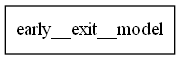

In [7]:

model.build(input_shape=(None,32,32,1))
model.build_graph()
model.summary() # 看建立的架構
tf.keras.utils.plot_model(model, to_file=".\images\my_first_model_with_shape_info.png", show_shapes=True)

In [8]:
print(tf.config.list_physical_devices('GPU'))
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"]) # 定義所要採用的loss funtion, optimizer, metrics
history = model.fit_generator(datagen.flow(train_x,train_y,batch_size=32),steps_per_epoch=len(train_x)/32,epochs=16,validation_data=(test_x,test_y))
print(train_x.shape)
# history = model.fit(x=train_x,y=train_y,batch_size=8,epochs=16,verbose=1,validation_split=0.1) # 設定 batch(批), epochs(跌代), verbose, validation(驗證，功能還不太確定)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/16


C:\Users\zz408\AppData\Local\Temp\ipykernel_34396\4041189075.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_x,train_y,batch_size=32),steps_per_epoch=len(train_x)/32,epochs=16,validation_data=(test_x,test_y))


1875/1875 [==============================] - 35s 12ms/step - loss: 6.9981 - output_1_loss: 1.4576 - output_2_loss: 1.5512 - output_3_loss: 1.0386 - output_4_loss: 1.1805 - output_5_loss: 0.8970 - output_6_loss: 0.8732 - output_1_accuracy: 0.5192 - output_2_accuracy: 0.4933 - output_3_accuracy: 0.6660 - output_4_accuracy: 0.6259 - output_5_accuracy: 0.7107 - output_6_accuracy: 0.7103 - val_loss: 2.5333 - val_output_1_loss: 0.6659 - val_output_2_loss: 0.7603 - val_output_3_loss: 0.3049 - val_output_4_loss: 0.3514 - val_output_5_loss: 0.2302 - val_output_6_loss: 0.2207 - val_output_1_accuracy: 0.8155 - val_output_2_accuracy: 0.8024 - val_output_3_accuracy: 0.9165 - val_output_4_accuracy: 0.9186 - val_output_5_accuracy: 0.9311 - val_output_6_accuracy: 0.9326
Epoch 2/16
1875/1875 [==============================] - 23s 12ms/step - loss: 4.4114 - output_1_loss: 1.1409 - output_2_loss: 1.1932 - output_3_loss: 0.5937 - output_4_loss: 0.6651 - output_5_loss: 0.4152 - output_6_loss: 0.4032 - outp

繪製訓練過程曲線

In [9]:
# print(history.history)

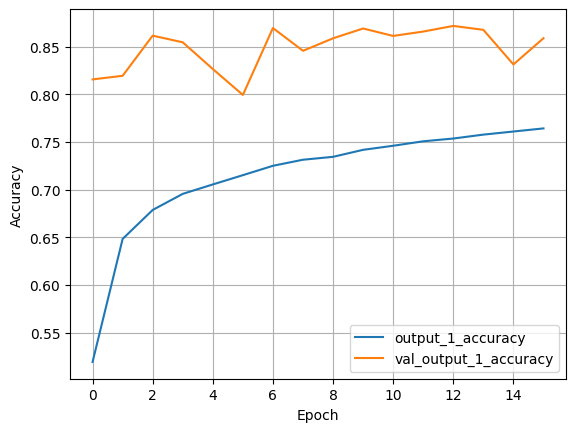

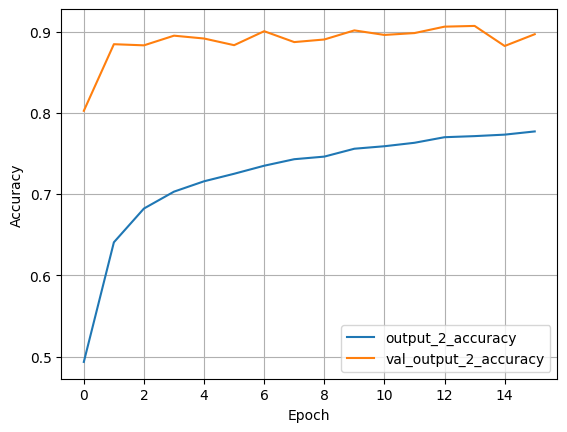

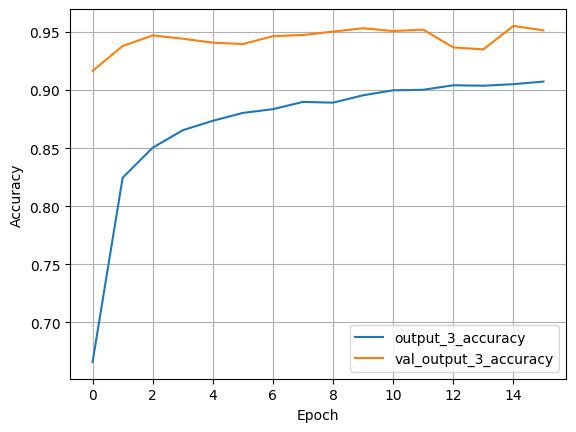

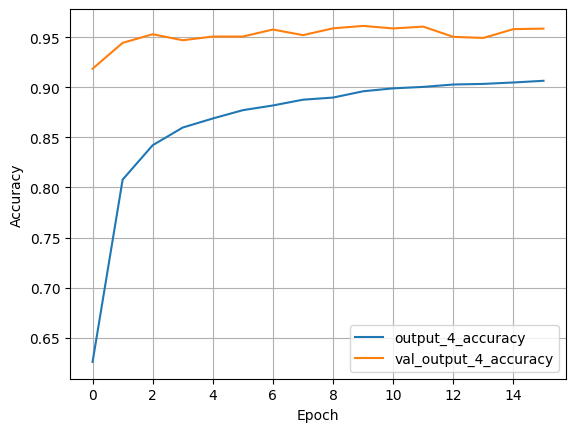

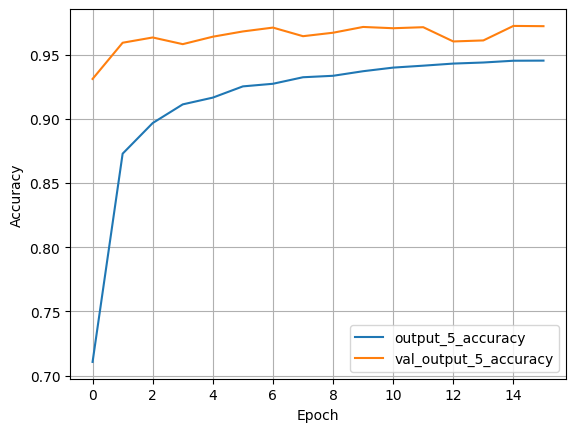

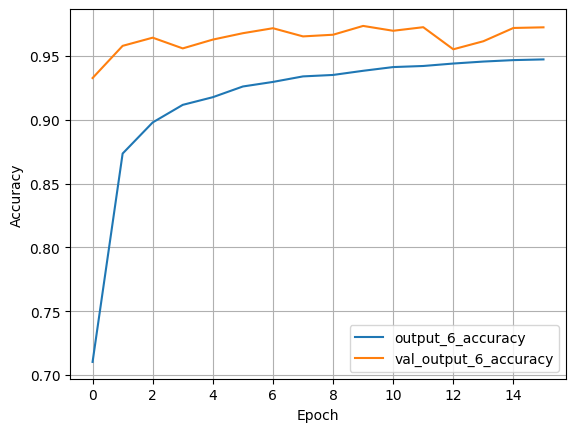

In [10]:
plt.plot(history.history['output_1_accuracy'], label='output_1_accuracy')
plt.plot(history.history['val_output_1_accuracy'], label = 'val_output_1_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['output_2_accuracy'], label='output_2_accuracy')
plt.plot(history.history['val_output_2_accuracy'], label = 'val_output_2_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['output_3_accuracy'], label='output_3_accuracy')
plt.plot(history.history['val_output_3_accuracy'], label = 'val_output_3_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['output_4_accuracy'], label='output_4_accuracy')
plt.plot(history.history['val_output_4_accuracy'], label = 'val_output_4_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['output_5_accuracy'], label='output_5_accuracy')
plt.plot(history.history['val_output_5_accuracy'], label = 'val_output_5_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['output_6_accuracy'], label='output_6_accuracy')
plt.plot(history.history['val_output_6_accuracy'], label = 'val_output_6_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

以test data來評估訓練準確度

In [11]:
import time
# result = model.call(test_x[90:99],ttraining=True)
# print(np.argmax(result,axis=-1))
start = time.time()
result,info = model.call(test_x[90:99],ttraining=False)
end = time.time()
# result = model.predict(test_x[0:9])
print("use_time: ",end-start)
print('前9筆預測結果: ',np.argmax(result, axis=-1),'\n')
print('前9筆實際值: ',np.argmax(test_y[90:99],axis=-1),'\n')
print("比對結果",np.argmax(result, axis=-1)-np.argmax(test_y[90:99],axis=-1))

use_time:  0.08005905151367188
前9筆預測結果:  [3 6 9 3 1 4 1 7 6] 

前9筆實際值:  [3 6 9 3 1 4 1 7 6] 

比對結果 [0 0 0 0 0 0 0 0 0]


In [12]:
import cv2
def show_xy(event,x,y,flags,param):
    global dots, draw,img_gray                    # 定義全域變數
    if flags == 1:
        if event == 1:
            dots.append([x,y])            # 如果拖曳滑鼠剛開始，記錄第一點座標
        if event == 4:
            dots = []                     # 如果放開滑鼠，清空串列內容
        if event == 0 or event == 4:
            dots.append([x,y])            # 拖曳滑鼠時，不斷記錄座標
            x1 = dots[len(dots)-2][0]     # 取得倒數第二個點的 x 座標
            y1 = dots[len(dots)-2][1]     # 取得倒數第二個點的 y 座標
            x2 = dots[len(dots)-1][0]     # 取得倒數第一個點的 x 座標
            y2 = dots[len(dots)-1][1]     # 取得倒數第一個點的 y 座標
            cv2.line(draw,(x1,y1),(x2,y2),(255,255,255),20)  # 畫直線
        cv2.imshow('img', draw)#draw

In [13]:
import csv
csvfile = open('info.csv','a+')
r = csv.writer(csvfile)
r.writerow(['',"Exit_1_entropy","Exit_2_entropy","Exit_3_entropy","Exit_4_entropy","Exit_5_entropy","predict_number"])
test_times = 0

dots = []   # 建立空陣列記錄座標
w = 320
h = 320
draw = np.zeros((h,w,3), dtype='uint8')   # 建立 420x240 的 RGBA 黑色畫布

pretest_img = cv2.imread("./images/gray.png",flags=0)
pretest_img = pretest_img/255
pretest_img = np.expand_dims(pretest_img,0)
pretest_img = np.expand_dims(pretest_img,-1)
model.call(pretest_img,ttraining=False)

while True:
    cv2.imshow('img', draw)
    cv2.setMouseCallback('img', show_xy)
    keyboard = cv2.waitKey(5)                    # 每 5 毫秒偵測一次鍵盤事件
    if keyboard == ord('q'):
        break                                    # 按下 q 就跳出

    if keyboard == ord('n'):
        img_gray = cv2.cvtColor(draw, cv2.COLOR_BGR2GRAY)   # 轉為灰度圖
        img = cv2.resize(img_gray,(32,32))                          # 變更圖片尺寸
        cv2.imwrite(".\images\gray.png",img)
        # img = np.array(img)
        # img = np.pad(img,pad_width=((2,2),(2,2)),mode='constant',constant_values=0)
        img = img/255
        img = np.expand_dims(img,0)
        img = np.expand_dims(img,-1)
        # np.savetxt("show_data.txt",img[0,...,0],fmt='%.01f')
        # print(img)
        print(img.shape)
        # model.summary()
        # predict = model(img)
        # predict = model.predict(img)
        # print(predict)
        
        # predict = model.call(img,ttraining=True)
        # print(np.argmax(predict,axis=-1))
        start = time.time()
        predict,info = model.call(img,ttraining=False)
        end = time.time()
        print("use_time :",end-start)
        predict_number = np.argmax(predict,axis=-1)
        print('預測結果:\n',predict_number)
        # print(info)
        test_times+=1
        r.writerow([test_times,np.float32(info["Exit_1_entropy"]),np.float32(info["Exit_2_entropy"]),np.float32(info["Exit_3_entropy"]),np.float32(info["Exit_4_entropy"]),np.float32(info["Exit_4_entropy"]),predict_number])
        draw = np.zeros((h,w,3), dtype='uint8')
    if keyboard == ord('r'):
        draw = np.zeros((h,w,3), dtype='uint8')  # 按下 r 就變成原本全黑的畫布
        cv2.imshow('img', draw)


(1, 32, 32, 1)
use_time : 0.012999534606933594
預測結果:
 [3]
(1, 32, 32, 1)
use_time : 0.013005733489990234
預測結果:
 [2]
(1, 32, 32, 1)
use_time : 0.005513429641723633
預測結果:
 [1]
(1, 32, 32, 1)
use_time : 0.012993335723876953
預測結果:
 [0]


儲存模型

In [14]:
model.save('./Model/CNN_MODEL')
model.save_weights('./Model/SAVE_WEIGHTS/SW')
# LeNet-5第三層自訂_subclassing實作early exit\CNN_WEIGHTS

INFO:tensorflow:Assets written to: ./Model/CNN_MODEL\assets


INFO:tensorflow:Assets written to: ./Model/CNN_MODEL\assets
